# Classification
Topics covered in this chapter of the book-

* 4.1 An Overview of Classification................. 128
* 4.2 Why Not Linear Regression? ................. 129
* 4.3 Logistic Regression....................... 130
  * 4.3.1 The Logistic Model................... 131 
  * 4.3.2 Estimating the Regression Coefficients . . . . . . . . 133 
  * 4.3.3 Making Predictions................... 134 
  * 4.3.4 Multiple Logistic Regression. . . . . . . . . . . . . . 135 
  * 4.3.5 Logistic Regression for >2 Response Classes . . . . . 137
* 4.4 Linear Discriminant Analysis ................. 138 
  * 4.4.1 Using Bayes’ Theorem for Classification . . . . . . . 138
  * 4.4.2 Linear Discriminant Analysis for p=1. . . . . . . . 139 
  * 4.4.3 Linear Discriminant Analysis for p >1 . . . . . . . . 142 
  * 4.4.4 Quadratic Discriminant Analysis . . . . . . . . . . . 149
* 4.5 A Comparison of Classification Methods . . . . . . . . . . . 151
* 4.6 Lab: Logistic Regression, LDA, QDA, and KNN . . . . . . 154

**Following is the summary of concepts along with data and python code-**


_____________

### Classification Overview 

All the ways of categorising observations into some defined groups come under classification. So in case of qualitative or categorical response variable Y, the prediction model is also classification model.
Three of the most widely-used classifiers, discussed in this chapter: 
* logistic regression 
* linear discriminant analysis
* K-nearest neighbors
We discuss more computer-intensive methods in later chapters, such as generalized additive models (Chapter 7), trees, random forests, and boosting (Chapter 8), and support vector machines (Chapter 9).

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN

### Logistic Regression

Logistic regression models the probability that response variable, Y belongs to a particular category. In logistic regression, we use the following logistic function on X in a way that p(X) or Y is between 0 and 1.
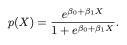

Transforming & extending it multiple logistic regression-
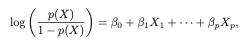
The left-hand side is called the log-odds or logit. We use the maximum likelihood method to estimate β0,β1,...,βp.

In [19]:
# Lets using logistic regression to predict percentage returns on the stocks. This data consists of percentage returns for the S&P 500 stock index over 1,250 days, from year 2001 to 2005. 
# For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. 
Smarket = pd.read_csv('../data/Smarket.csv', header=0)
Smarket.head

<bound method NDFrame.head of       Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]>

In [9]:
# Lets set the model equation
y, X = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket, return_type = 'dataframe')
print(X)

      Intercept   Lag1   Lag2   Lag3   Lag4   Lag5   Volume
0           1.0  0.381 -0.192 -2.624 -1.055  5.010  1.19130
1           1.0  0.959  0.381 -0.192 -2.624 -1.055  1.29650
2           1.0  1.032  0.959  0.381 -0.192 -2.624  1.41120
3           1.0 -0.623  1.032  0.959  0.381 -0.192  1.27600
4           1.0  0.614 -0.623  1.032  0.959  0.381  1.20570
...         ...    ...    ...    ...    ...    ...      ...
1245        1.0  0.422  0.252 -0.024 -0.584 -0.285  1.88850
1246        1.0  0.043  0.422  0.252 -0.024 -0.584  1.28581
1247        1.0 -0.955  0.043  0.422  0.252 -0.024  1.54047
1248        1.0  0.130 -0.955  0.043  0.422  0.252  1.42236
1249        1.0 -0.298  0.130 -0.955  0.043  0.422  1.38254

[1250 rows x 7 columns]


In [10]:
# Fit logit model 
logit = sm.Logit(y.iloc[:,1], X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                0.002074
Time:                        23:01:16   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [11]:
# Predict the probability of the market going up
logit.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

In [12]:
# Mark it 1 if market goes above 50% else 0
predict_label = pd.DataFrame(np.zeros(shape=(1250,1)), columns = ['label'])
predict_label.iloc[logit.predict()>0.5] = 1

In [17]:
# Use confusion matrix between actual and predicted values. 
# The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. 
confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0])

array([[145, 457],
       [141, 507]])

In [18]:
# Fraction of days for which the prediction was correct
np.mean(y.iloc[:,1] == predict_label.iloc[:,0])

0.5216

However, this result is misleading because we trained and tested the model on the same set of 1, 250 observations. In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data.

*To implement this strategy, why don't you take up this next challenge?*

Try to first create a vector corresponding to the observations from 2001 through 2004. Then use this vector to create a held out data set of observations from 2005. 
Do try this challenge and compare on results to the book, page 159-160.

_____________

### Linear Discriminant Analysis

Earlier we saw, logistic regression involves directly modeling Pr(Y = k|X = x) i.e. conditional distribution of the response Y, given the predictor(s) X. In alternate approaches like LDA, we model the distribution of the predictors X separately in each of the response classes (i.e. given Y ), and then use Bayes’ theorem to flip these around into estimates for Pr(Y = k|X = x).

In LDA, we assume that X = (X1,X2,...,Xp) is drawn from a multivariate Gaussian (or multivariate normal) distribution, with a class-specific mean vector and a common covariance matrix.
The multivariate Gaussian distribution assumes that each individual predictor follows a one-dimensional normal distribution, with some correlation between each pair of predictors.

In [24]:
# Lets try on the same market data split into training and testing
Smarket_2005 = Smarket.query('Year >= 2005')
Smarket_train = Smarket.query('Year < 2005')
y_train, X_train = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_2005, return_type = 'dataframe')

In [26]:
skl_lda = LDA(n_components=2).fit(X_train.iloc[:,1:3],y_train.iloc[:,1])
X_labels=skl_lda.predict(X_train.iloc[:,1:3])
X_prob=skl_lda.predict_proba(X_train.iloc[:,1:3])

/Users/shilpa/Library/Python/3.7/lib/python/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/shilpa/Library/Python/3.7/lib/python/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [27]:
X_test_labels=skl_lda.predict(X_test.iloc[:,1:3])
X_test_prob = skl_lda.predict_proba(X_test.iloc[:,1:3]) 
X_test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0.

In [28]:
np.mean(y_test.iloc[:,1]==X_test_labels)

0.5595238095238095

In [36]:
print(skl_lda.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


_____________

### Quadratic Discriminant Analysis

Like LDA, the QDA classifier results from assuming that the observations from each class are drawn from a Gaussian distribution, and plugging estimates for the parameters into Bayes’ theorem in order to per- form prediction. However, unlike LDA, QDA assumes that each class has its own covariance matrix

In [32]:
sk_qda=QDA(store_covariance=True).fit(X_train.iloc[:,1:3],y_train.iloc[:,1])
X_labels = sk_qda.predict(X_train.iloc[:,1:3]) #gives you the predicted label for each sample
X_prob = sk_qda.predict_proba(X_train.iloc[:,1:3]) #the probability of each sample to belong to each class

X_test_labels=sk_qda.predict(X_test.iloc[:,1:3])
X_test_prob = sk_qda.predict_proba(X_test.iloc[:,1:3]) 

print(np.mean(y_test.iloc[:,1]==X_test_labels))

0.5992063492063492


In [33]:
print(sk_qda.means_)
print(sk_qda.covariance_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]]), array([[ 1.51700576, -0.02787349],
       [-0.02787349,  1.49026815]])]



_____________

### K-nearest neighbour

KNN takes a completely different approach from the classifiers seen in this chapter. In order to make a prediction for an observation X = x, the K training observations that are closest to x are identified. Then X is assigned to the class to which the plurality of these observations belong. Hence KNN is a completely non-parametric approach: no assumptions are made about the shape of the decision boundary.

Therefore, we can expect this approach to dominate LDA and logistic regression when the decision boundary is highly non-linear. On the other hand, KNN does not tell us which predictors are important; we don’t get a table of coefficients.

QDA serves as a compromise between the non-parametric KNN method and the linear LDA and logistic regression approaches. Since QDA assumes a quadratic decision boundary, it can accurately model a wider range of problems than can the linear methods. Though not as flexible as KNN, QDA can perform better in the presence of a limited number of training observations because it does make some assumptions about the form of the decision boundary.

In [40]:
nhb_knn=KNN(n_neighbors=4).fit(X_train.iloc[:,1:3],y_train.iloc[:,1])

X_test_labels=nhb_knn.predict(X_test.iloc[:,1:3])
X_test_prob = nhb_knn.predict_proba(X_test.iloc[:,1:3]) 

print(np.mean(y_test.iloc[:,1]==X_test_labels))
nhb_knn

0.5158730158730159


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')